# How to create stacked bar charts based on specified columns in a DataFrame, with each chart displaying the distribution of a variable and variable name.

EDA can be time intensive, especially when you have a large number of variables to parse through. Creating multiple bar charts by copying and pasting the same code and changing the varialbe names is not optimal. Below, I will demonstrate how to create a function that you can iterate through to develop these simple EDA charts for you.

This can be especially helpful for datasets with high dimensionality, where limited knowledge is known about the target varialbes distribution by various attributes.


## Connect to your Google Drive

In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import required libraries

In [2]:
import pandas as pd
import sqlite3
import csv
import numpy as np
import matplotlib.pyplot as plt

# Turn off warnings for ease of viewing (I like to do this - you don't have to)
import warnings
warnings.filterwarnings("ignore")

# Set option to see all columns in output (I like to do this - you don't have to)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## 2. Import a .csv file to use as an example:
This data was downloaded from:  https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download

In [3]:
# Import the the .csv file from a google drive folder path
raw_df = pd.read_csv('/content/drive/MyDrive/Ryan Other Data Science Projects/Creating a Function with Bar Charts/Customer-Churn-Records.csv',
                     header=0)

# Only imports 1000 rows of data - for
df = raw_df#.head(1000)

print(df.shape)
df.head(1)

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


## 3. Identify the target variable and which variables you want to exclude from the stacked bar chart function
Here, you will create the exited_flag variable as the "target_variable", which will be used to identify the "stacks" within the barchart.

In [4]:
# Identify the target varible for the barcharts
df['exited_flag'] = np.where(df['Exited'] == 1,"yes","no")
target_variable = 'exited_flag'

# Identify the variables to exclude from barchart
excluded_variables = ('RowNumber','CustomerId','Surname','Balance','EstimatedSalary','Point Earned','CreditScore')

## 4. Create the stacked_barchart function to iterate through your DataFrame
This will iterate through the DF, identify the columns not excluded, and create a stacked barchart with the varialbes name within the chart title.

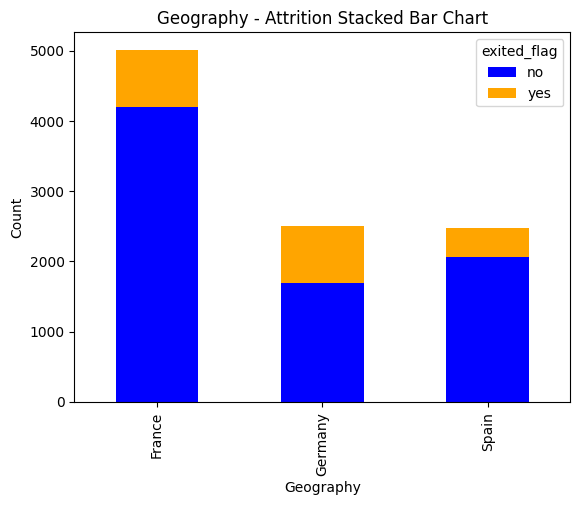

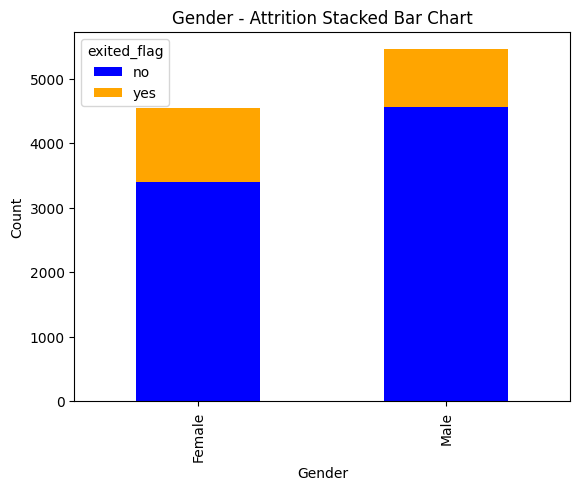

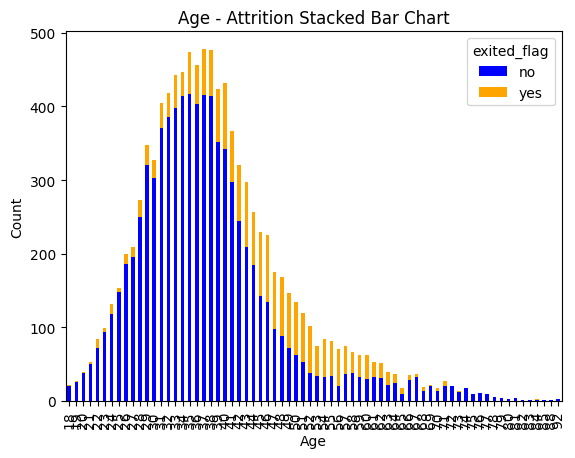

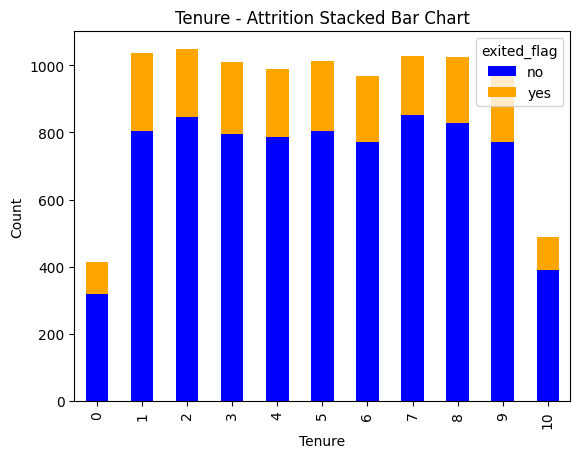

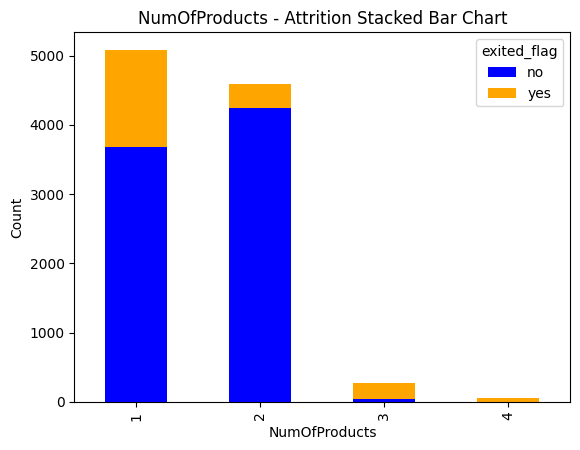

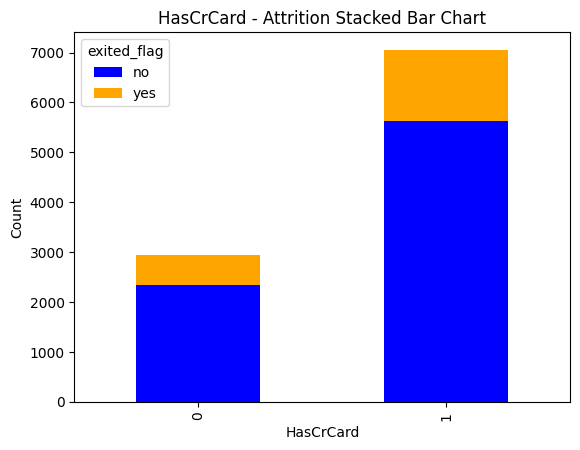

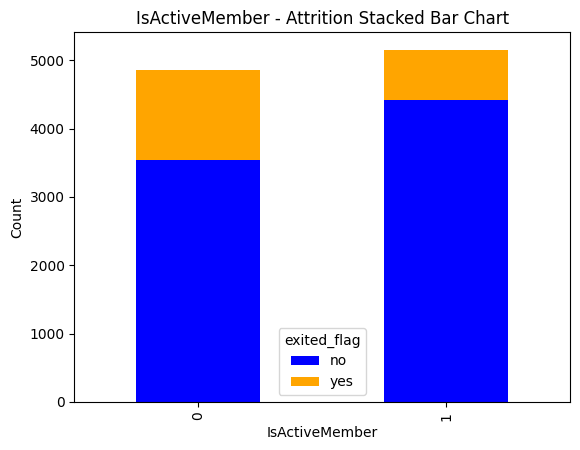

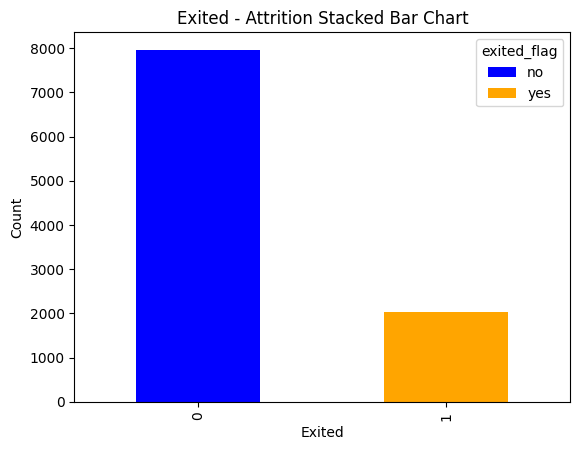

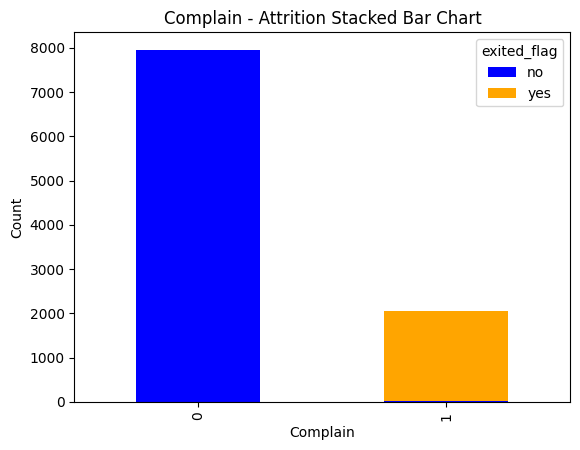

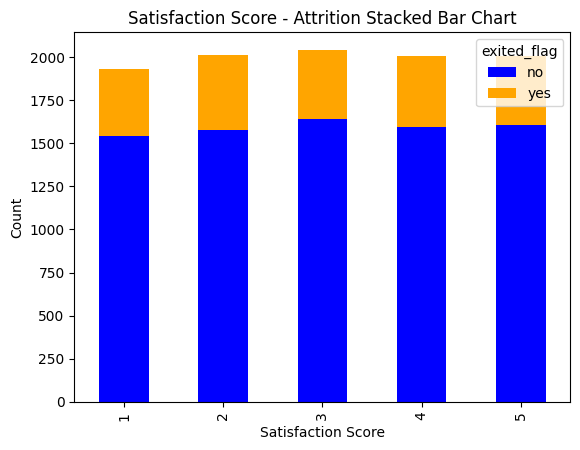

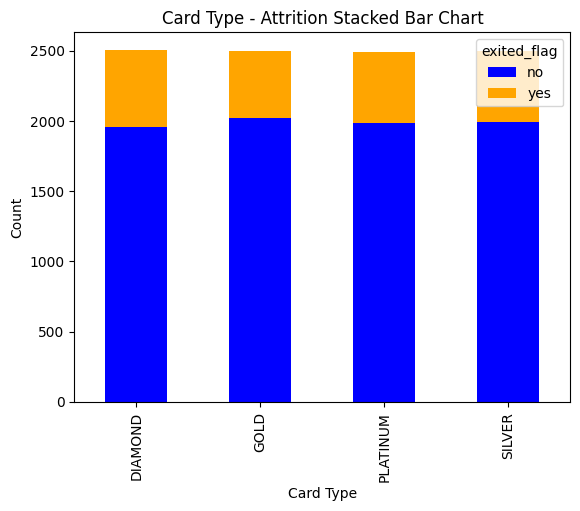

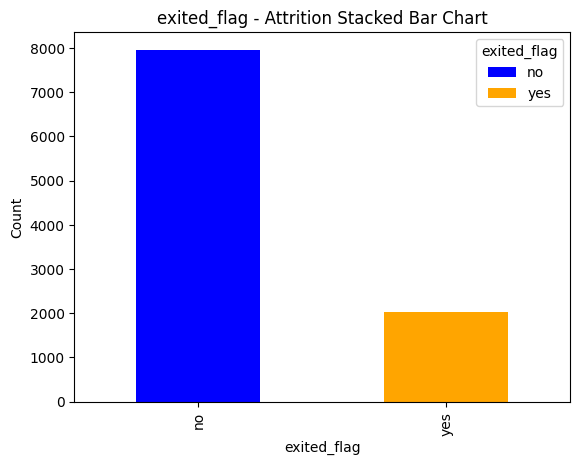

In [5]:
# Create function to produce barcharts by the identified target_variable
def stacked_barchart(df):
    # Place column names into an object
    col_names = df.columns
    # Iterate through column names and identify which columns to include/exclude from stacked barchart
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            # Create the stacked barchart for each attribute
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            ax = stacked_bar.plot(kind='bar',
                                  stacked=True, title=f'{name} - Attrition Stacked Bar Chart',
                                  color=['blue', 'orange'])
            ax.set_xlabel(name)  # Set x-axis label
            ax.set_ylabel("Count")  # Set y-axis label
            ax.legend(title=target_variable)  # Set legend with target_variable as the title
            plt.show()  # Display the chart

# Call the function with the dataframe to create bar charts
stacked_barchart(df)